<a href="https://colab.research.google.com/github/shunrei9841-sudo/Guadalupe/blob/main/Tarea%20EDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

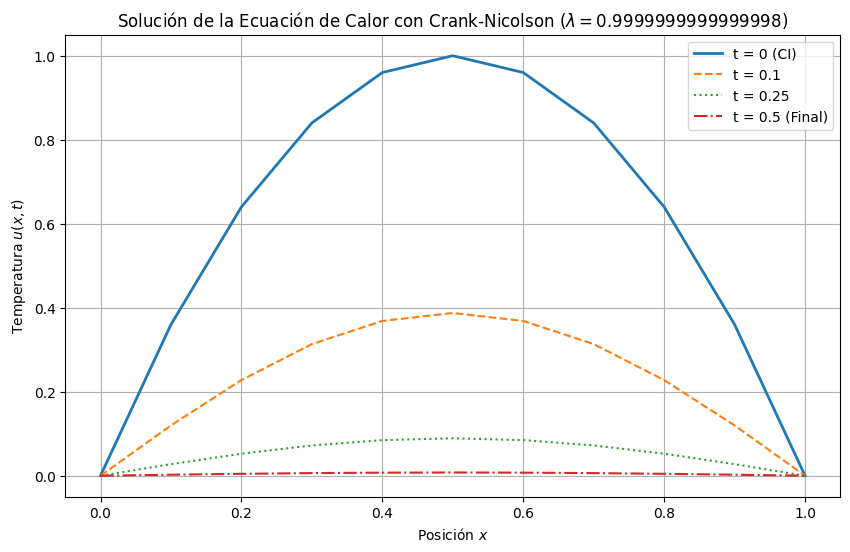

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

# --- 1. Parámetros del Problema ---
L = 1.0  # Dominio en x: [0, 1]
T_final = 0.5  # Tiempo total de simulación (ejemplo)

# --- 2. Parámetros de Discretización ---
h = 0.1  # Tamaño de paso espacial (dx)
N = int(L / h)  # Número de subintervalos
M = N - 1  # Número de nodos interiores (i=1 a 9)

# Paso de tiempo y lambda (elegido para lambda=1)
dt = 0.01
lambda_cn = dt / (h**2) # lambda_cn = 1.0

# Número de pasos de tiempo
num_pasos = int(T_final / dt)
time = np.linspace(0, T_final, num_pasos + 1)
x = np.linspace(0, L, N + 1)

# Inicializar la solución U[tiempo, espacio]
U = np.zeros((num_pasos + 1, N + 1))

# --- 3. Condición Inicial (CI) ---
# u(x, 0) = 1 - 4(x - 1/2)^2
U[0, :] = 1 - 4 * (x - 0.5)**2
U[0, 0] = 0.0
U[0, N] = 0.0

# Vector de solución interior inicial U^0
U_interior_n = U[0, 1:N]

# --- 4. Matrices del Sistema (A U^{n+1} = RHS) ---
alpha = lambda_cn

# Matriz A (Lado izquierdo, implícito): Tridiagonal [-alpha, 2*(1+alpha), -alpha]
A = np.diag([2 * (1 + alpha)] * M) + \
    np.diag([-alpha] * (M - 1), k=1) + \
    np.diag([-alpha] * (M - 1), k=-1)

# Matriz B (Para el cálculo del lado derecho): Tridiagonal [alpha, 2*(1-alpha), alpha]
B = np.diag([2 * (1 - alpha)] * M) + \
    np.diag([alpha] * (M - 1), k=1) + \
    np.diag([alpha] * (M - 1), k=-1)

# --- 5. Iteración Temporal (Loop de Crank-Nicolson) ---
for n in range(num_pasos):
    # Lado Derecho (RHS = B * U^n)
    RHS = B @ U_interior_n

    # Resolver el sistema lineal: A U^{n+1} = RHS
    U_interior_n_plus_1 = solve(A, RHS)

    # Guardar la solución en el array U, incluyendo los BC (ceros)
    U[n+1, 1:N] = U_interior_n_plus_1
    U[n+1, 0] = 0.0
    U[n+1, N] = 0.0

    # Actualizar para el siguiente paso de tiempo
    U_interior_n = U_interior_n_plus_1

# --- 6. Visualización de Resultados (Gráfico) ---
plt.figure(figsize=(10, 6))
plt.plot(x, U[0, :], label='t = 0 (CI)', linewidth=2)
plt.plot(x, U[int(0.1/dt), :], label='t = 0.1', linestyle='--')
plt.plot(x, U[int(0.25/dt), :], label='t = 0.25', linestyle=':')
plt.plot(x, U[-1, :], label=f't = {T_final} (Final)', linestyle='-.')

# **Línea Corregida (usando 'fr' para raw f-string)**
plt.title(fr'Solución de la Ecuación de Calor con Crank-Nicolson ($\lambda={lambda_cn}$)')

plt.xlabel('Posición $x$')
plt.ylabel('Temperatura $u(x, t)$')
plt.grid(True)
plt.legend()
plt.show()

In [6]:
!pip install tabulate

Ejercicio 1. Obtenga una tabla similar a la tabla 2.6 de la imagen adjunta y use esta para verificar que su código es correcto. Observe hasta que valor de t llega. Use la librería tabulate.

In [7]:
import numpy as np
from scipy.linalg import solve
from tabulate import tabulate  # <--- Esta importación ya está satisfecha

# --- 1. Parámetros del Problema ---
L = 1.0
T_final = 0.10  # Tiempo final para la tabla
h = 0.1  # Tamaño de paso espacial (dx)

# --- 2. Parámetros de Discretización ---
N = int(L / h)
M = N - 1  # Nodos interiores (M=9)
dt = 0.01
lambda_cn = dt / (h**2) # lambda_cn = 1.0

# Cálculo de la malla
num_pasos = int(T_final / dt)
time = np.linspace(0, T_final, num_pasos + 1)
x = np.linspace(0, L, N + 1)

# Inicialización
U = np.zeros((num_pasos + 1, N + 1))
# Condición Inicial
U[0, :] = 1 - 4 * (x - 0.5)**2
U[0, 0] = 0.0
U[0, N] = 0.0
U_interior_n = U[0, 1:N]

# --- 3. Matrices del Sistema ---
alpha = lambda_cn

# Matriz A (Implícita)
A = np.diag([2 * (1 + alpha)] * M) + \
    np.diag([-alpha] * (M - 1), k=1) + \
    np.diag([-alpha] * (M - 1), k=-1)

# Matriz B (Lado Derecho)
B = np.diag([2 * (1 - alpha)] * M) + \
    np.diag([alpha] * (M - 1), k=1) + \
    np.diag([alpha] * (M - 1), k=-1)

# --- 4. Iteración Temporal ---
for n in range(num_pasos):
    RHS = B @ U_interior_n
    U_interior_n_plus_1 = solve(A, RHS)
    U[n+1, 1:N] = U_interior_n_plus_1
    U_interior_n = U_interior_n_plus_1

# --- 5. Generación de la Tabla 2.6 Numérica ---

# Seleccionar solo las columnas x=0.0 a x=0.5 (índices 0 a 5)
U_table = U[:, :6]
t_col = time.reshape(-1, 1)
data_for_table = np.hstack((t_col, U_table))

# Crear encabezados
headers = ["t"] + [f"x = {val:.1f}" for val in x[:6]]

# Formatear datos para tabulate
table_data = []
for row in data_for_table:
    # Formato: t con 2 decimales, u con 4 decimales
    table_data.append([f"{row[0]:.2f}"] + [f"{val:.4f}" for val in row[1:]])

# Imprimir la tabla
print("## Tabla 2.6 (Numérica - Crank-Nicolson)")
print(tabulate(table_data, headers=headers, tablefmt="fancy_grid"))

## Tabla 2.6 (Numérica - Crank-Nicolson)
╒══════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╤═══════════╕
│    t │   x = 0.0 │   x = 0.1 │   x = 0.2 │   x = 0.3 │   x = 0.4 │   x = 0.5 │
╞══════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0    │         0 │    0.36   │    0.64   │    0.84   │    0.96   │    1      │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ 0.01 │         0 │    0.3014 │    0.5657 │    0.7615 │    0.8804 │    0.9202 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ 0.02 │         0 │    0.2676 │    0.5048 │    0.6885 │    0.803  │    0.8417 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ 0.03 │         0 │    0.2399 │    0.4548 │    0.6231 │    0.73   │    0.7665 │
├──────┼───────────┼───────────┼───────────┼───────────┼───────────┼───────────┤
│ 0.04 │         0 │    0.2164 │    0.411  │    0.5646 │    0.6626 │

Ejercicio 2: La tabla 2.7 de la imagen adjunta contiene los valores reales de la solución. Use su código para graficar en un mismo panel su solución numérica y la solución real. Determine el error de su solución.

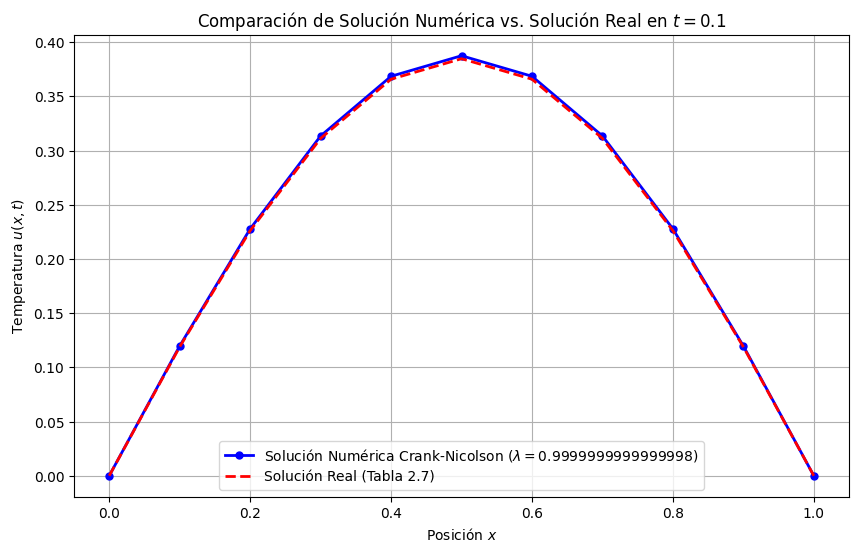


## Análisis del Error en t = 0.10
Error Absoluto Máximo (L_inf): 2.752353e-03
Error Cuadrático Medio (L_2):   5.686354e-04

### Error en Cada Nodo Interior (t = 0.10)
+-----+----------+---------+------------------+
|   x |   U_Real |   U_Num |   Error Absoluto |
+=====+==========+=========+==================+
| 0.1 |   0.1189 |  0.1197 |     -0.000836007 |
+-----+----------+---------+------------------+
| 0.2 |   0.2261 |  0.2277 |     -0.00164791  |
+-----+----------+---------+------------------+
| 0.3 |   0.3112 |  0.3135 |     -0.00226218  |
+-----+----------+---------+------------------+
| 0.4 |   0.3658 |  0.3685 |     -0.00269123  |
+-----+----------+---------+------------------+
| 0.5 |   0.3847 |  0.3875 |     -0.00275235  |
+-----+----------+---------+------------------+
| 0.6 |   0.3658 |  0.3685 |     -0.00269123  |
+-----+----------+---------+------------------+
| 0.7 |   0.3112 |  0.3135 |     -0.00226218  |
+-----+----------+---------+------------------+
| 0.8 |   0.2261

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve
from tabulate import tabulate

# --- 1. CONFIGURACIÓN Y CÁLCULO (Reutilización del Ejercicio 1) ---

# Parámetros y discretización
L = 1.0
T_final = 0.10
h = 0.1
N = int(L / h)
M = N - 1
dt = 0.01
lambda_cn = dt / (h**2) # lambda_cn = 1.0
num_pasos = int(T_final / dt)

time = np.linspace(0, T_final, num_pasos + 1)
x = np.linspace(0, L, N + 1)

# Inicialización
U = np.zeros((num_pasos + 1, N + 1))
U[0, :] = 1 - 4 * (x - 0.5)**2
U[0, 0] = 0.0
U[0, N] = 0.0
U_interior_n = U[0, 1:N]

# Matrices (A y B)
alpha = lambda_cn
A = np.diag([2 * (1 + alpha)] * M) + np.diag([-alpha] * (M - 1), k=1) + np.diag([-alpha] * (M - 1), k=-1)
B = np.diag([2 * (1 - alpha)] * M) + np.diag([alpha] * (M - 1), k=1) + np.diag([alpha] * (M - 1), k=-1)

# Iteración Temporal
for n in range(num_pasos):
    RHS = B @ U_interior_n
    U_interior_n_plus_1 = solve(A, RHS)
    U[n+1, 1:N] = U_interior_n_plus_1
    U_interior_n = U_interior_n_plus_1

# Obtener la solución numérica en el tiempo final (t=0.10)
U_num_t_final = U[-1, :]

# --- 2. SOLUCIÓN REAL (Tabla 2.7 en t=0.10) ---

# Valores de la Tabla 2.7 para x=0.1 a x=0.5
U_real_half = np.array([0.1189, 0.2261, 0.3112, 0.3658, 0.3847])
# Vector completo usando simetría y BCs (0.0)
U_real_t_final = np.array([0.0] + list(U_real_half) + list(U_real_half[:-1][::-1]) + [0.0])

# --- 3. GRÁFICO COMPARATIVO ---

plt.figure(figsize=(10, 6))
# Usamos fr'' para evitar el SyntaxWarning con \l en el título
plt.plot(x, U_num_t_final, 'b-o', label=fr'Solución Numérica Crank-Nicolson ($\lambda={lambda_cn}$)', linewidth=2, markersize=5)
plt.plot(x, U_real_t_final, 'r--', label='Solución Real (Tabla 2.7)', linewidth=2)
plt.title(fr'Comparación de Solución Numérica vs. Solución Real en $t={T_final}$')
plt.xlabel('Posición $x$')
plt.ylabel('Temperatura $u(x, t)$')
plt.grid(True)
plt.legend()
plt.show()

# --- 4. CÁLCULO Y VISUALIZACIÓN DEL ERROR ---

# Calcular las diferencias
error_vector = U_real_t_final - U_num_t_final

# Error Absoluto Máximo (L-infinito)
error_max = np.max(np.abs(error_vector))

# Error Cuadrático Medio (L-2, normalizado)
error_l2 = np.sqrt(np.sum(error_vector**2)) / (N+1)

print("\n## Análisis del Error en t = 0.10")
print(f"Error Absoluto Máximo (L_inf): {error_max:.6e}")
print(f"Error Cuadrático Medio (L_2):   {error_l2:.6e}")

# Tabla de errores por nodo
error_table_data = []
# Solo nodos interiores (i=1 a N-1)
for i in range(1, N):
    error_table_data.append([
        f"{x[i]:.1f}",
        f"{U_real_t_final[i]:.4f}",
        f"{U_num_t_final[i]:.4f}",
        f"{error_vector[i]:.6e}"
    ])

print("\n### Error en Cada Nodo Interior (t = 0.10)")
error_headers = ["x", "U_Real", "U_Num", "Error Absoluto"]
print(tabulate(error_table_data, headers=error_headers, tablefmt="grid"))